In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'weather_classification_data.csv')

In [3]:
data.head(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy


In [4]:
data.Location.unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [5]:
enc_loc = {'inland':1, 'mountain':2, 'coastal':3}
enc_loc

{'inland': 1, 'mountain': 2, 'coastal': 3}

In [6]:
data.Location.map(enc_loc)

0        1
1        1
2        2
3        3
4        2
        ..
13195    2
13196    3
13197    3
13198    1
13199    2
Name: Location, Length: 13200, dtype: int64

In [7]:
data.Location = data.Location.map(enc_loc)

In [8]:
data.head(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,1,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,1,Cloudy


In [9]:
data.Season.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [10]:
enc_sea = {'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4}

In [11]:
enc_sea

{'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}

In [12]:
data.Season.map(enc_sea)

0        1
1        2
2        2
3        2
4        1
        ..
13195    3
13196    1
13197    4
13198    1
13199    4
Name: Season, Length: 13200, dtype: int64

In [13]:
data.Season = data.Season.map(enc_sea)

In [14]:
data.head(1)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,1,3.5,1,Rainy


In [15]:
data['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [16]:
enc_wea = {'Rainy':1, 'Cloudy':2, 'Sunny':3, 'Snowy':4}
enc_wea 


{'Rainy': 1, 'Cloudy': 2, 'Sunny': 3, 'Snowy': 4}

In [17]:

data['Weather Type'].map(enc_wea)

0        1
1        2
2        3
3        3
4        1
        ..
13195    1
13196    4
13197    2
13198    4
13199    1
Name: Weather Type, Length: 13200, dtype: int64

In [18]:
data['Weather Type'] = data['Weather Type'].map(enc_wea)

In [19]:
data.head(1)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,1,3.5,1,1


In [20]:
data['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [21]:
enc_cloud = {'partly cloudy':1, 'clear':2, 'overcast':3, 'cloudy':4}
enc_cloud

{'partly cloudy': 1, 'clear': 2, 'overcast': 3, 'cloudy': 4}

In [22]:
data['Cloud Cover'].map(enc_cloud)

0        1
1        1
2        2
3        2
4        3
        ..
13195    3
13196    4
13197    3
13198    3
13199    3
Name: Cloud Cover, Length: 13200, dtype: int64

In [23]:
data['Cloud Cover'] = data['Cloud Cover'].map(enc_cloud)

In [24]:
data.head(1)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,1,3.5,1,1


In [25]:
from sklearn.model_selection import train_test_split
X = data.drop('Weather Type', axis =1)


In [26]:
# import classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Create model 
model_dict={
    'lr_model': LogisticRegression(),
    'svc_model': SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()
}

In [28]:
y = data['Weather Type']

In [29]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
#import axxuracy
from sklearn.metrics import accuracy_score

In [31]:
acc_s = list()

In [32]:
# Train the model
for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc_s.append(ac)

d:\New Folder\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
import matplotlib.pyplot as plt


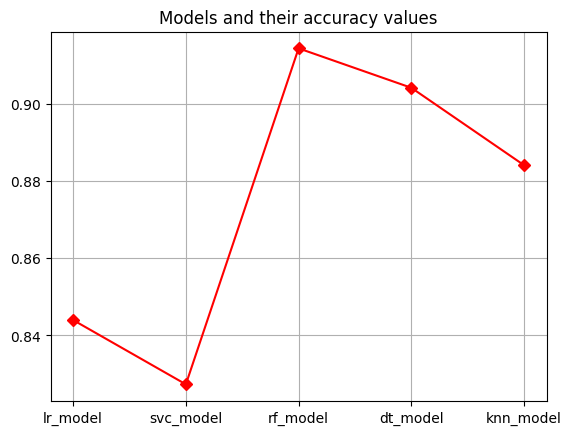

In [39]:
#PLot model and accuracy score
plt.title("Models and their accuracy values")
plt.plot(model_dict.keys(), acc_s, marker='D', color='red')
plt.grid()

In [35]:
# since 'svc_models' gives the best accuracy we will use the 'svc_models'
svc_m = SVC()

In [36]:
svc_m.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
# model save
import joblib

In [38]:
joblib.dump(svc_m, 'model_weather.pt')

['model_weather.pt']